In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
print(np.__version__)

1.26.4


## 1. ÌîÑÎ°úÏ†ùÌä∏ : Data Labeling

1. Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞
2. Using Moving Average Ï†ÅÏö©ÌïòÍ∏∞
3. Local Min-Max Ï†ÅÏö©ÌïòÍ∏∞
4. Trend Scanning Ï†ÅÏö©ÌïòÍ∏∞

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='time'>

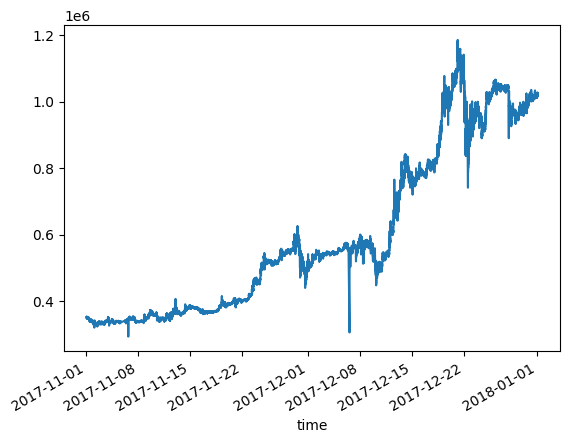

In [3]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
DATA_PATH = '/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ_·Ñë·Ö≥·ÜØ·Ñå·Ö¶·Ü®'

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

### 1-1. Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞

In [7]:
# window ÏßÄÏ†ï
window = 10 # ÏïûÏÑú ÏÇ¨Ïö©Ìïú windowÏùò Í∞íÏùÄ 10ÏûÖÎãàÎã§.

# momentum_signal ÎßåÎì§Í∏∞
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)

# s_momentum_signal ÎßåÎì§Í∏∞
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

- Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞(modify_data)ÏóêÏÑú ÌïÑÏöîÌïú close(Ï¢ÖÍ∞Ä)Î•º Í∞ÄÏ†∏Ïò§Í≥†,
- ÏàòÏãùÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞(s_momentum_signal)Ïùò Ï¢ÖÍ∞ÄÏôÄ ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï®.






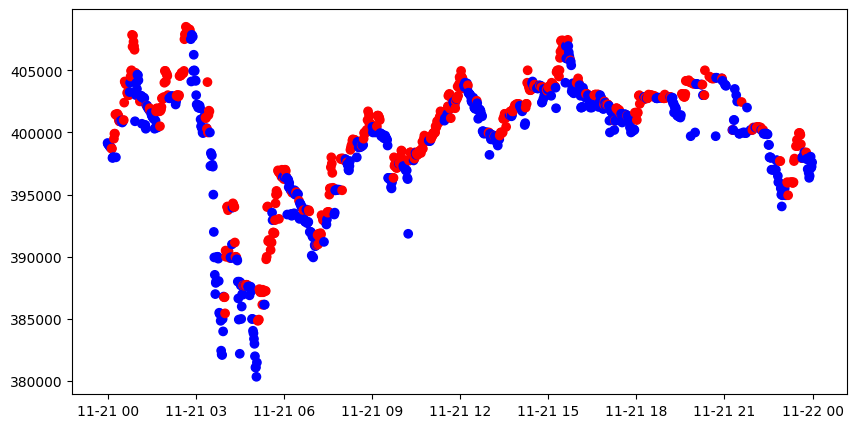

In [8]:
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### 1-2. Using Moving Average Ï†ÅÏö©ÌïòÍ∏∞


In [9]:
# momentum_signal
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

- Using Moving Average ÏàòÏãùÏùÑ Ï†ÅÏö©Ìïú Í≤ÉÍ≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏

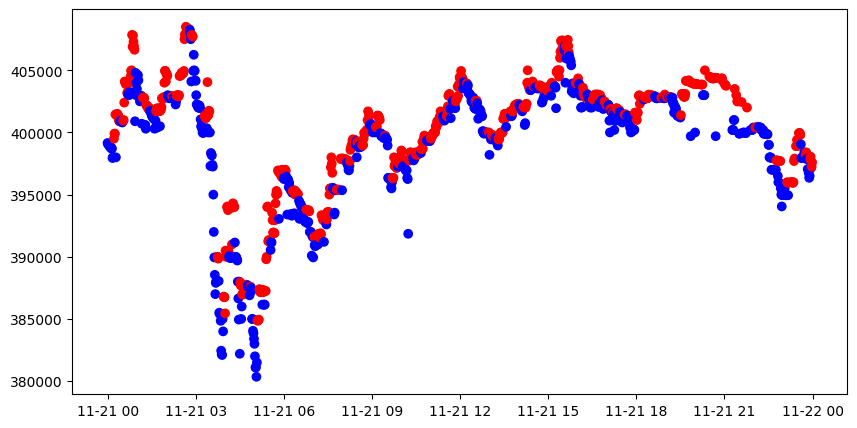

In [10]:
# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### 1-3. Local Min-Max Ï†ÅÏö©ÌïòÍ∏∞

In [15]:
# Local min / max Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0

    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

In [16]:
# Local mins, maxesÎ•º ÌôïÏù∏
# return Í∞íÏùÄ dict ÌòïÌÉúÎ°ú 2Í∞úÏùò dfÏù¥ Î∞òÌôòÎêòÏñ¥ÏïºÌï®.
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes ÌôïÏù∏
# print(mins)
# print('--'*20)
# print(maxes)

(376546.5, 412585.0)

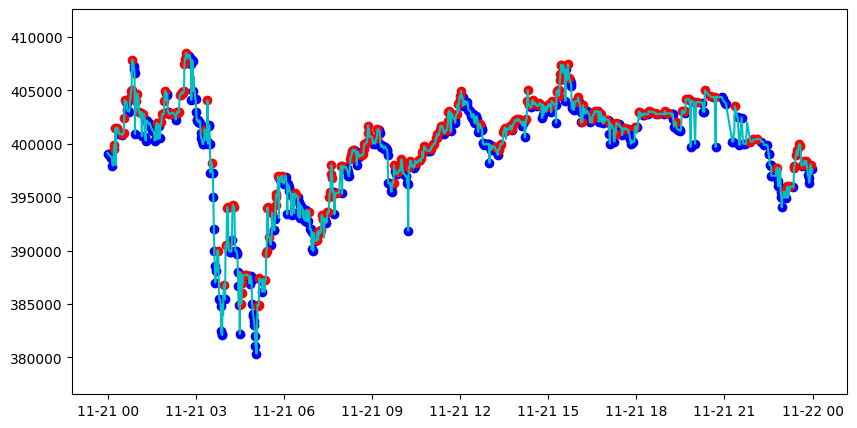

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')
ax.scatter(mins.min_time, mins.local_min, c='blue')
ax.scatter(maxes.max_time, maxes.local_max, c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

### 1-4. Trend Scanning Ï†ÅÏö©ÌïòÍ∏∞

- OLSÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌïòÎäî Í≤ΩÏö∞ Ïú†Ïö©ÌïòÍ≤å ÏÇ¨Ïö© Í∞ÄÎä•
- ÏïÑÎûò Ìï®ÏàòÏóêÏÑú ols.tvalueÎ•º ÌÜµÌï¥ t-valueÍ∞íÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ Ï∂îÏÑ∏(trend) Ï∂îÏ†ï

In [20]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [21]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [22]:
# Ïù¥ ÏΩîÎìú Î∏îÎü≠ÏùÄ Ïã§ÌñâÏóê 20-30Î∂ÑÏ†ïÎèÑÍ∞Ä ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # Ï†ÑÎ∞© ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏÉòÌîå Ï∂îÏ∂ú
    if look_forward_window > subset.shape[0]:
        continue

    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ t ÌÜµÍ≥ÑÎüâÍ∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏÑ∏ Ï∂îÏ†ï
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))

    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33384/33384 [15:40<00:00, 35.49it/s]


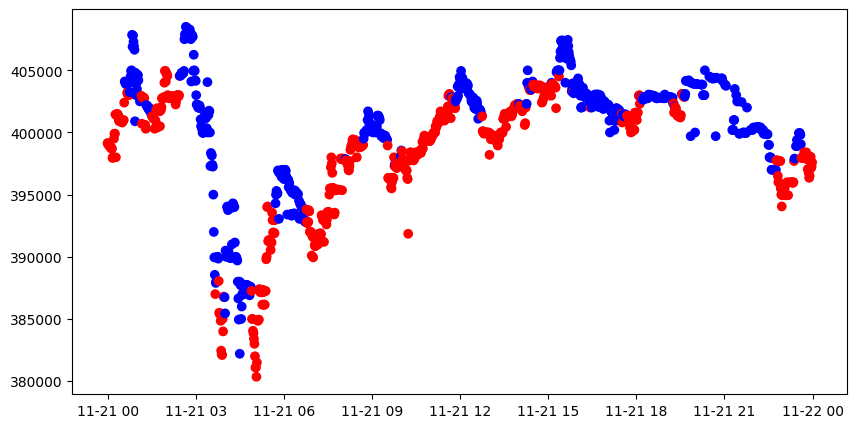

In [23]:
# ÏãúÍ∞ÅÌôî
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

## 2. ÌîÑÎ°úÏ†ùÌä∏ : Feature Engineering

1. ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
2. Technical Index Ï†ÅÏö©ÌïòÍ∏∞
3. Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞

### 2-1. ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [24]:
!pip install ta==0.9.0
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28893 sha256=2cd2c1ffe211f9fac8916dd956a5dcd8e0fbd7b7e4f9ecf92013dad1ebb6b7c5
  Stored in directory: /root/.cache/pip/wheels/b5/fd/8d/250a0fe7de9a6bfc9c22235b544c550f9a868b9af79aa7e9ed
Successfully built ta


In [25]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ_·Ñë·Ö≥·ÜØ·Ñå·Ö¶·Ü®/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [26]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
DATA_PATH = '/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ_·Ñë·Ö≥·ÜØ·Ñå·Ö¶·Ü®'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

### 2-2. Technical Index Ï†ÅÏö©ÌïòÍ∏∞



In [27]:
# Í∏∞Ïà†Ï†Å ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [28]:
# ÏàòÏùµÎ•† / Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [29]:
df_tmp_data = df_.join(df_label_data).dropna()

# X, y Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
X = df_tmp_data.iloc[:, 5:-1]
y = df_tmp_data.iloc[:, -1]

# StandardScaler Ï†ÅÏö©
sc = StandardScaler()

# fit_transform ÏÇ¨Ïö©
X_sc = sc.fit_transform(X)

# DataFrame Î≥ÄÌôò
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [30]:
# RandomForest Î™®Îç∏ Ï†ÅÏö©
rfc = RandomForestClassifier(class_weight='balanced')

# RandomForest fit ÌïòÍ∏∞
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

### 2-3. Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞

#### 2-3-1. MDI, Mean Decrease Impurity

In [31]:
# MDI, Mean Decrease Impurity
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

mean       std
volume_cmf        0.043787  0.002349
volume_fi         0.044301  0.002318
volume_mfi        0.045600  0.002549
volume_sma_em     0.037433  0.002167
volume_vpt        0.025454  0.001777
volatility_atr    0.072630  0.003307
volatility_ui     0.051758  0.002301
trend_macd_diff   0.081183  0.004211
trend_adx         0.051755  0.002191
trend_trix        0.062752  0.003157
trend_mass_index  0.068454  0.003224
trend_dpo         0.024091  0.001743
trend_aroon_ind   0.029908  0.001638
momentum_rsi      0.035910  0.002255
momentum_wr       0.029405  0.002083
vol_change_5      0.016516  0.001052
ret_5             0.032307  0.002466
vol_change_10     0.016734  0.000973
ret_10            0.048138  0.003213
vol_change_20     0.018724  0.000945
ret_20            0.043032  0.002658
std_30            0.045872  0.002321
vol_std_30        0.074253  0.003002

#### 2-3-2. MDA, Mean Decrease Accuracy

In [32]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree Î∞è Support Vector Machine Ïô∏Ïóê Îã§Î•∏ Î∂ÑÎ•òÍ∏∞(classifier)Î•º ÏÇ¨Ïö©Ìï¥Î¥ÖÏãúÎã§.
cv = KFold(n_splits=5) # n_splitsÏùÑ Î≥ÄÍ≤ΩÌï¥Î¥ÖÏãúÎã§.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [33]:
# plot_feature_importance Ìï®Ïàò ÎßåÎì§Í∏∞
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

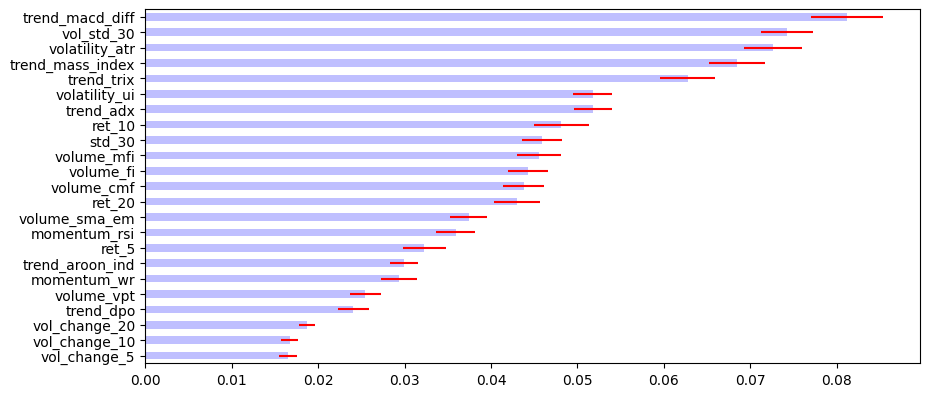

In [34]:
plot_feature_importance(feat_imp)

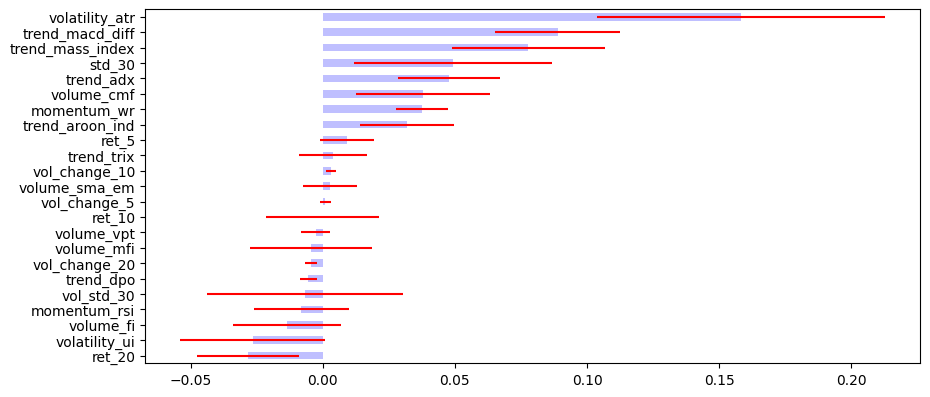

In [35]:
plot_feature_importance(feat_imp_mda)

### 2-4. Sequential Feature Selection

#### 2-4-1. RFE CV, Recursive Feature Elimination

In [36]:
svc_rbf = SVC(kernel='linear', probability=True)
rfe_cv = RFECV(svc_rbf, cv=cv)
rfe_fitted = rfe_cv.fit(X_sc, y)

In [37]:
rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df

Optimal_Features Ranking
volume_cmf                  False      12
volume_fi                   False       4
volume_mfi                  False      14
volume_sma_em               False       7
volume_vpt                  False       8
volatility_atr               True       1
volatility_ui               False      11
trend_macd_diff              True       1
trend_adx                   False      19
trend_trix                  False      10
trend_mass_index            False      13
trend_dpo                   False      16
trend_aroon_ind             False       5
momentum_rsi                False       2
momentum_wr                 False       3
vol_change_5                False      20
ret_5                       False      18
vol_change_10               False      21
ret_10                      False      17
vol_change_20               False      15
ret_20                      False       6
std_30                       True       1
vol_std_30                  False       9

In [94]:
selected_features = rfe_df[rfe_df["Optimal_Features"] == True].index.tolist()

#### 2-4-2. SFS, Sequential Feature Selection

In [38]:
n = 2

sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [39]:
sfs_rank = sfs_fitted.get_support()
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns=["Optimal_Features"])

sfs_df [sfs_df ["Optimal_Features"]==True].index

Index(['volume_mfi', 'trend_macd_diff'], dtype='object')

#### 2-4-3. SHAP, Shapley Additive explanations

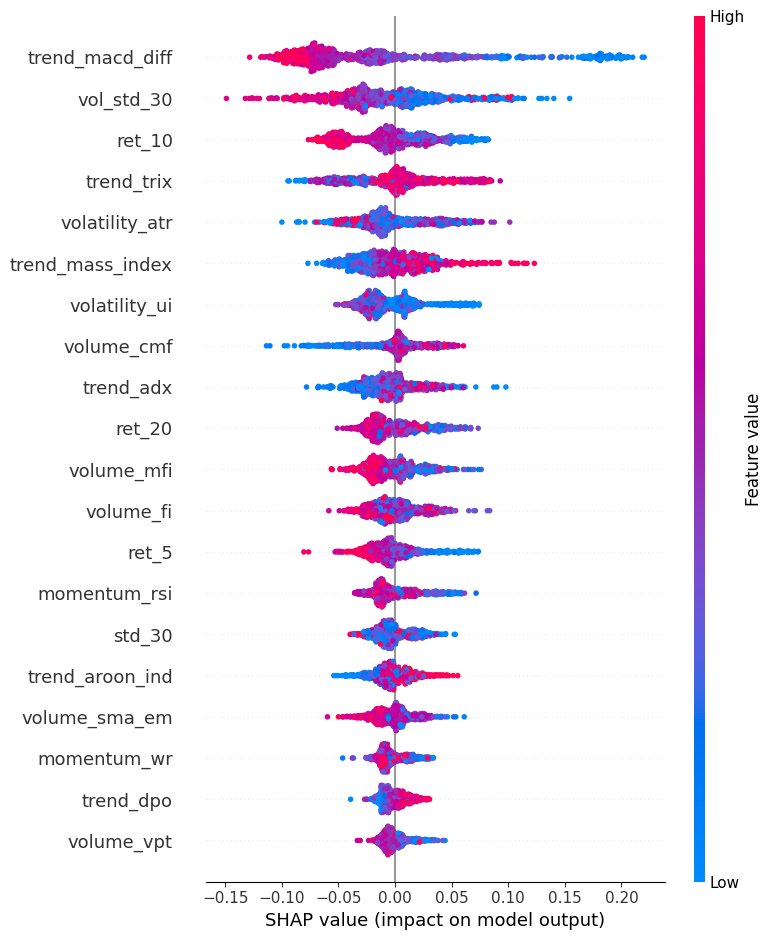

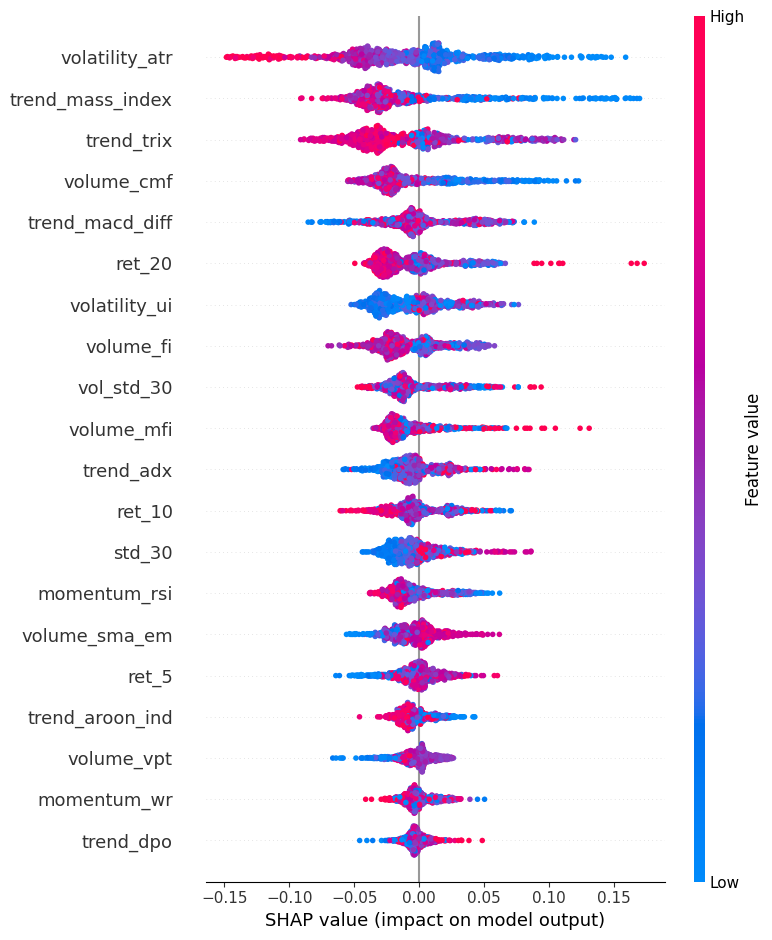

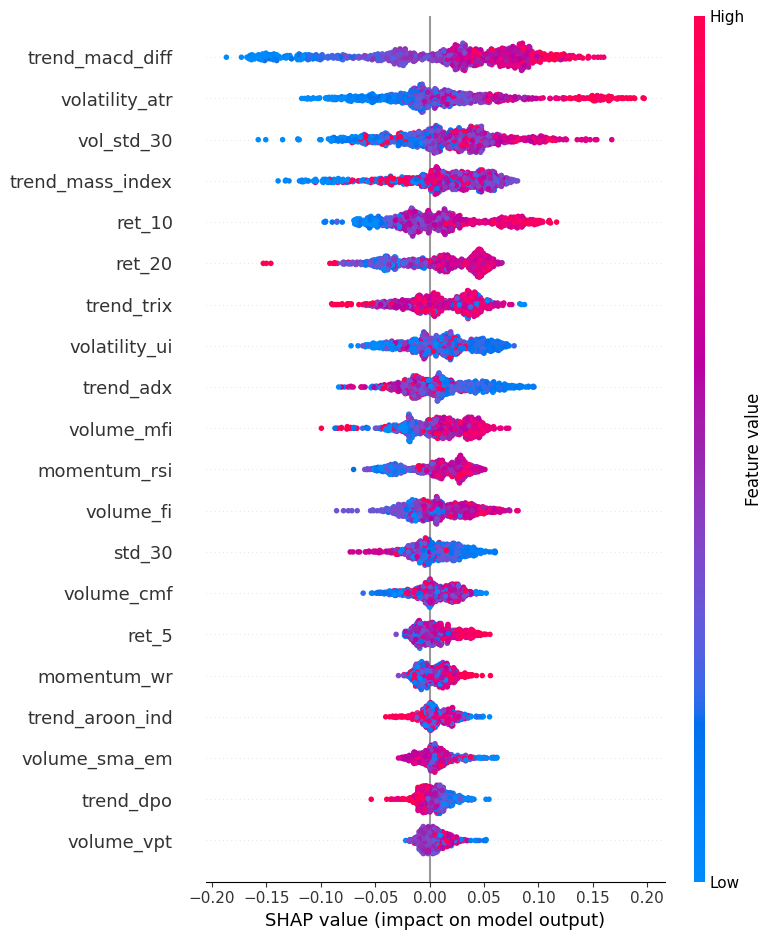

In [40]:
# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc, model_output="raw")
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc ÏÇ¨Ïö© shap.summary_plot Í∑∏Î¶¨Í∏∞
# ÌÅ¥ÎûòÏä§ 0Ïóê ÎåÄÌïú SHAP summary plot
shap.summary_plot(shap_value[:, :, 0], X_sc, class_names='class 0')

# ÌÅ¥ÎûòÏä§ 1
shap.summary_plot(shap_value[:, :, 1], X_sc, class_names='class 1')

# ÌÅ¥ÎûòÏä§ 2
shap.summary_plot(shap_value[:, :, 2], X_sc, class_names='class 2')

## 3. ÌîÑÎ°úÏ†ùÌä∏ : Model Traning

1. ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
2. Purged K-fold for Cross-ValidationÏ†ÅÏö©ÌïòÍ∏∞
3. Model Ï†ÅÏö©ÌïòÍ∏∞



### 3-1. ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [41]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ_·Ñë·Ö≥·ÜØ·Ñå·Ö¶·Ü®/')
from libs.mlutil.pkfold import PKFold

In [44]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è pickle ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
DATA_PATH = '/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ_·Ñë·Ö≥·ÜØ·Ñå·Ö¶·Ü®/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Î™®Îç∏Ïóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.
df_data['t_value'].value_counts()

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú® ÎÇòÎàÑÍ∏∞
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
train_x = train_x[:1000] # Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¶ùÍ∞Ä ÌòπÏùÄ Í∞êÏÜåÏãúÏºú Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
train_y = train_y[:1000]

### 3-2. Purged K-fold for Cross-Validation Ï†ÅÏö©ÌïòÍ∏∞

In [45]:
n_cv = 4 # ÏïûÏóêÏÑú ÏßÄÏ†ïÌïú Í∞íÏùÄ 4ÏûÖÎãàÎã§. ÏñºÎßàÎ•º ÎÑ£ÏùÑÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í≥† Ïôú Ïù¥ Í∞íÏùÑ ÎÑ£ÏóàÎäîÏßÄÏóê ÎåÄÌï¥ÏÑú ÏÑ§Î™ÖÌï¥Î¥ÖÏãúÎã§.
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold
cv = PKFold(n_cv, t1, 0)

### 3-3. Model Ï†ÅÏö©ÌïòÍ∏∞

#### 3-3-1. LGBM + Bagging + SMOTE + GridSearchCV

In [83]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

bag_lgbm = BaggingClassifier(
    estimator=lgbm,
    n_jobs=-1,
    random_state=42
)

bc_params = {
    'n_estimators': [5, 10],  # Î∞∞ÍπÖÏóêÏÑú Î™®Îç∏ Ïàò
    'max_features': [1.0],  # Î∞∞ÍπÖÏóêÏÑú ÌäπÏÑ± ÎπÑÏú®
    'bootstrap_features': [False],  # ÌäπÏÑ± Î∂ÄÌä∏Ïä§Ìä∏Îû© off

    'estimator__n_estimators': [100, 300],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__max_depth': [5, -1],
    'estimator__num_leaves': [31, 63],
    'estimator__min_child_samples': [20]
}

gs_lgbm = GridSearchCV(
    estimator=bag_lgbm,
    param_grid=bc_params,
    cv=4,
    n_jobs=-1,
    verbose=1
)
gs_lgbm.fit(train_x_resampled, train_y_resampled)

gs_lgbm_best = gs_lgbm.best_estimator_

Fitting 4 folds for each of 32 candidates, totalling 128 fits


================= confusion matrix ====================
[[62 74]
 [13 42]]
Ï†ïÌôïÎèÑ:0.5445026178010471, Ï†ïÎ∞ÄÎèÑ:0.3620689655172414, Ïû¨ÌòÑÏú®:0.7636363636363637
auc:0.6919786096256685


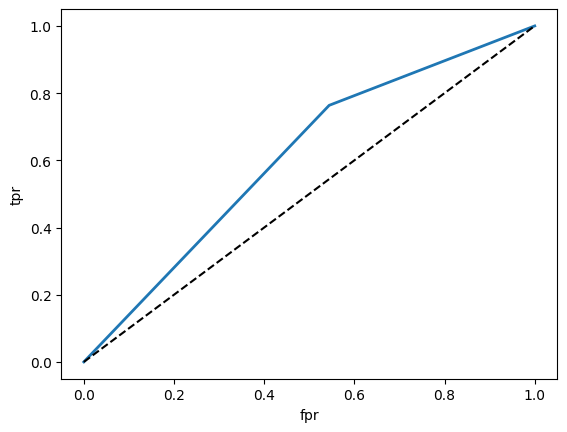

In [86]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = gs_lgbm_best.predict(test_x)
prob_y = gs_lgbm_best.predict_proba(test_x)

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

# ROC curve ÎßåÎì§Í∏∞
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC curve ÏãúÍ∞ÅÌôî
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

#### 3-3-2. LGBM + SMOTE + GridSearchCV

In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, -1],
    'num_leaves': [31, 63],
    'min_child_samples': [20],
}

gs_lgbm = GridSearchCV(
    estimator=LGBMClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=4,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gs_lgbm.fit(train_x_resampled, train_y_resampled)
lgbm_best = gs_lgbm.best_estimator_

================= confusion matrix ====================
[[59 77]
 [11 44]]
Ï†ïÌôïÎèÑ:0.5392670157068062, Ï†ïÎ∞ÄÎèÑ:0.36363636363636365, Ïû¨ÌòÑÏú®:0.8
auc:0.7276737967914438


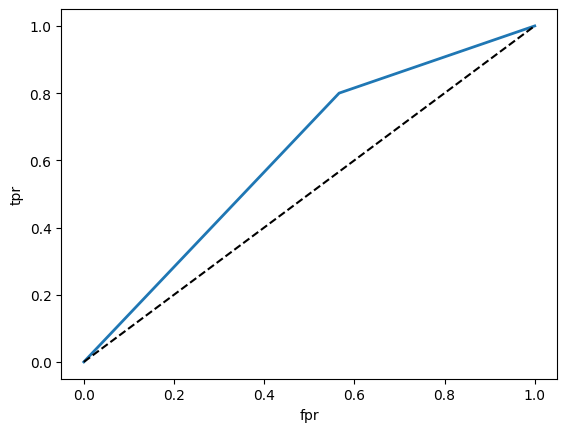

In [91]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = lgbm_best.predict(test_x)
prob_y = lgbm_best.predict_proba(test_x)

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

# ROC curve ÎßåÎì§Í∏∞
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC curve ÏãúÍ∞ÅÌôî
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

#### 3-3-3. RFE CV + LGBM + SMOTE + GridSearchCV

In [95]:
# 1. RFE Í≤∞Í≥ºÏóêÏÑú ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î™©Î°ù Ï∂îÏ∂ú
selected_features = rfe_df[rfe_df["Optimal_Features"] == True].index.tolist()

# 2. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X = df_data[selected_features]
y = df_data['t_value']

# 3. standardization
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

train_x = X_sc[:n_train, :]
test_x = X_sc[-n_test:, :]
train_y = y.iloc[:n_train]
test_y = y.iloc[-n_test:]

# 5. DataFrameÏúºÎ°ú Î≥ÄÌôò (ÌîºÏ≤ò Ïù¥Î¶ÑÍ≥º Ïù∏Îç±Ïä§ Ïú†ÏßÄ)
train_x = pd.DataFrame(train_x, index=train_y.index, columns=selected_features)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=selected_features)

# 6. ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏö©: 1000Í∞úÎßå ÏÇ¨Ïö©
train_x = train_x[:1000]
train_y = train_y[:1000]


In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, -1],
    'num_leaves': [31, 63],
    'min_child_samples': [20],
}

gs_lgbm = GridSearchCV(
    estimator=LGBMClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=4,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gs_lgbm.fit(train_x_resampled, train_y_resampled)
lgbm_best = gs_lgbm.best_estimator_

================= confusion matrix ====================
[[81 55]
 [12 43]]
Ï†ïÌôïÎèÑ:0.6492146596858639, Ï†ïÎ∞ÄÎèÑ:0.4387755102040816, Ïû¨ÌòÑÏú®:0.7818181818181819
auc:0.7937834224598931


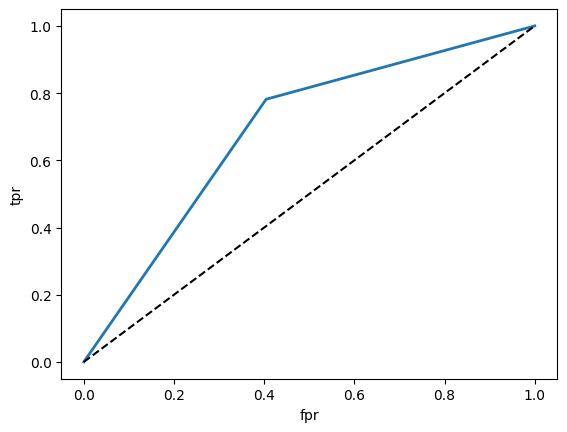

In [97]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = lgbm_best.predict(test_x)
prob_y = lgbm_best.predict_proba(test_x)

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

# ROC curve ÎßåÎì§Í∏∞
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC curve ÏãúÍ∞ÅÌôî
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

#### 3-3-3. RFE CV + LGBM + SMOTE + optuna

In [99]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 8.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 242.5/242.5 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.5/78.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
        'class_weight': 'balanced',
        'n_jobs': -1
    }

    model = LGBMClassifier(**params)
    scores = cross_val_score(model, train_x_resampled, train_y_resampled, cv=4, scoring='roc_auc')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Îπ†Î•¥Í≤å ÌôïÏù∏ÌïòÎ†§Î©¥ n_trials Ï§ÑÏù¥Í∏∞

print("Best AUC:", study.best_value)
print("Best Params:", study.best_params)

# ÏµúÏ†Å Î™®Îç∏Î°ú ÌïôÏäµ
best_lgbm = LGBMClassifier(**study.best_params)
best_lgbm.fit(train_x_resampled, train_y_resampled)

================= confusion matrix ====================
[[81 55]
 [12 43]]
Ï†ïÌôïÎèÑ:0.6492146596858639, Ï†ïÎ∞ÄÎèÑ:0.4387755102040816, Ïû¨ÌòÑÏú®:0.7818181818181819
auc:0.7847593582887701


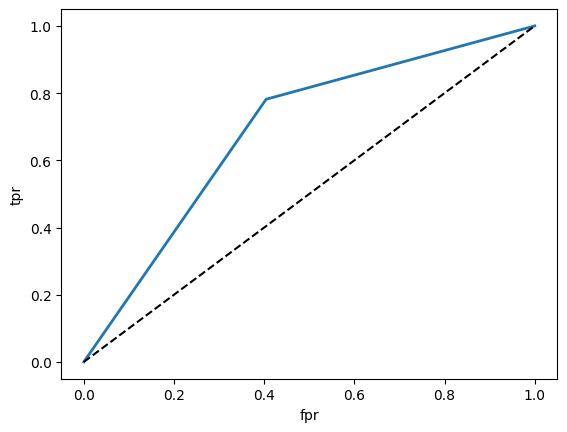

In [104]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = best_lgbm.predict(test_x)
prob_y = best_lgbm.predict_proba(test_x)

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

# ROC curve ÎßåÎì§Í∏∞
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, prob_y[:, 1])

# ROC curve ÏãúÍ∞ÅÌôî
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

### 3-4. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è ÏµúÏ¢Ö Î™®Îç∏ ÏÑ†Ï†ï

### üîç ÏÑ±Îä• ÎπÑÍµêÌëú

| Î™®Îç∏ Ï°∞Ìï©                              | Ï†ïÌôïÎèÑ (Accuracy) | Ï†ïÎ∞ÄÎèÑ (Precision) | Ïû¨ÌòÑÏú® (Recall) | AUC               |
|---------------------------------------|-------------------|--------------------|------------------|-------------------|
| LGBM + Bagging + SMOTE + GridSearchCV | 0.5445            | 0.3621             | 0.7636           | 0.6920            |
| LGBM + SMOTE + GridSearchCV           | 0.5393            | 0.3636             | 0.8000           | 0.7277            |
| RFE CV + LGBM + SMOTE + GridSearchCV  | **0.6492**        | **0.4388**         | **0.7818**       | **0.7938**        |
| RFE CV + LGBM + SMOTE + Optuna        | **0.6492**        | **0.4388**         | **0.7818**       | 0.7848            |

---

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ†Ï†ï Í∏∞Ï§Ä

- `AUC`Í∞Ä 0.79 Ïù¥ÏÉÅÏúºÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Ï°∞Ìï©ÏùÄ `RFE CV + LGBM + SMOTE + GridSearchCV`.
- Optuna Í∏∞Î∞ò Î™®Îç∏ÏùÄ AUCÎäî ÏïΩÍ∞Ñ ÎÇÆÏßÄÎßå, ÎèôÏùºÌïú Ï†ïÎüâ ÏßÄÌëú(Ï†ïÌôïÎèÑ/Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®)Î•º Î≥¥ÏûÑ.
- ÌïòÏßÄÎßå **GridSearchCV Î™®Îç∏Ïù¥ AUC Í∏∞Ï§ÄÏóêÏÑú Í∞ÄÏû• Ïö∞Ïàò**ÌïòÎØÄÎ°ú **ÏµúÏ¢Ö Î™®Îç∏Î°ú ÏÑ†Ï†ï**Ìï®.

---

### üèÜ ÏµúÏ¢Ö ÏÑ†Ï†ï Î™®Îç∏

**RFE CV + LGBM + SMOTE + GridSearchCV**

Ìï¥Îãπ Î™®Îç∏ÏùÄ ÌîºÏ≤ò ÏÑ†ÌÉùÏùÑ ÌÜµÌï¥ Î∂àÌïÑÏöîÌïú Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌïòÍ≥†, SMOTEÎ°ú ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏùÑ Ìï¥Í≤∞ÌñàÏúºÎ©∞, GridSearchCVÎ•º ÌÜµÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏµúÏ†ÅÌôîÌï®ÏúºÎ°úÏç® Í∞ÄÏû• Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§.
